In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

rc('text', usetex=False)
sns.set_context('paper', font_scale=2.0)
sns.set_style('whitegrid')

In [3]:
data = [11.8, 3.8, 40, 3]
labels = ["MIOpen", "Sparse GEMM (CSC)", "Conversion", "Im2col"]

In [6]:
df=pd.DataFrame([
    ["MIOpen", "Dense", 11.8],
    ["Sparse GEMM (CSC)", "Sparse", 3.8],
    ["Conversion", "Sparse", 40],
    ["Im2col", "Sparse", 3],
], columns=['Function', 'Matrix', 'Time'])
df

Function  Matrix  Time
0             MIOpen   Dense  11.8
1  Sparse GEMM (CSC)  Sparse   3.8
2         Conversion  Sparse  40.0
3             Im2col  Sparse   3.0

In [24]:
sparse_data = df
sparse_data = sparse_data.pivot(index='Matrix', columns='Function', values='Time')
sparse_data = sparse_data.reset_index()

sparse_data

Function  Matrix  Conversion  Im2col  MIOpen  Sparse GEMM (CSC)
0          Dense         NaN     NaN    11.8                NaN
1         Sparse        40.0     3.0     NaN                3.8

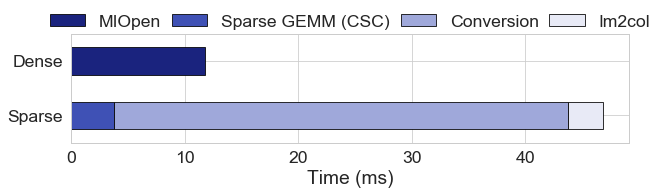

In [41]:
fig, ax = plt.subplots(figsize=(10, 2))
sparse_data.sort_values('Matrix', ascending=False).loc[:, ['Matrix', 'MIOpen', 'Sparse GEMM (CSC)', 'Conversion', 'Im2col']].plot.barh(
    stacked=True, x='Matrix', 
    color=['#1A237E', '#3F51B5', '#9FA8DA', '#E8EAF6'], ec='k',
    ax=ax)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, 
          frameon=False,
          fancybox=None, 
          columnspacing=0.6,
          facecolor=None, edgecolor=None, 
          bbox_to_anchor=(0.5, 1.33), loc=9, ncol=4)
ax.set_xlabel('Time (ms)')
ax.set_ylabel('')

plt.savefig('sparse_layer.pdf', bbox_inches='tight')
plt.show()
plt.close()